# Практическое задание 7. 

## Разработка рекомендательной системы на Python

**Инструкция:**

- Шаг 1. Постройте рекомендательную систему на примере данных о покупках. Исходные файлы: praktika_7.csv - пользовательские транзакции
   
Имя файла | Ссылка
-- | --
praktika_7.csv | https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/recomend/praktika_7.csv?raw=true

- Шаг 2. Реализуйте коллаборативную фильтрацию данных на основе пользователей. Используйте модель kNN. Проверить модель на покупателях с customer_id = 4 и customer_id = 21.
- Шаг 3. Опубликуйте файл расширения ipynb на платформе Odin.

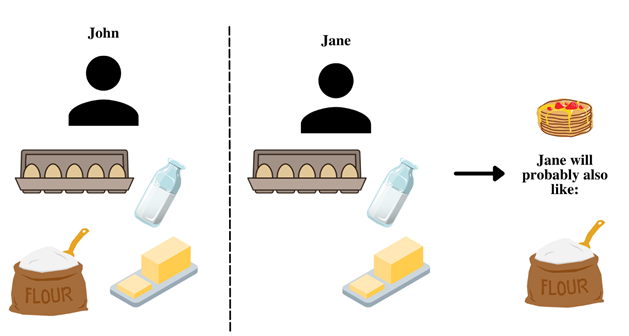

У сети продуктовых магазинов разрабатывается новое мобильное приложение, позволяющее покупателям размещать заказы еще до того, как они зайдут в магазин.

В приложении должна быть возможность показывать рекомендации: когда покупатель впервые нажимает на страницу «заказ», мы можем порекомендовать добавить в его корзину 10 лучших товаров, например, одноразовую посуду, свежее мясо, чипсы и т. д.

**Цель работы: получить список рекомендаций для указанного пользователя**, например:

Входные данные: идентификатор клиента

Результат: ранжированный список товаров (идентификаторов продуктов), которые пользователь, скорее всего, захочет положить в свою (пустую) «корзину».

In [36]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import warnings
warnings.filterwarnings('ignore')

In [37]:
from scipy.sparse import csr_matrix

In [38]:
df = pd.read_csv('https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/recomend/praktika_7.csv?raw=true')
df.head()

Unnamed: 0  customerId  productId  purchase_count
0           0           0          1               2
1           1           0         13               1
2           2           0         19               3
3           3           0         20               1
4           4           0         31               2

In [39]:
df=df[['customerId','productId','purchase_count']]
df.columns=['user','item','rating']
df.head()

user  item  rating
0     0     1       2
1     0    13       1
2     0    19       3
3     0    20       1
4     0    31       2

In [40]:
from sklearn.neighbors import NearestNeighbors  
from collections import defaultdict

In [41]:
df_matrix = df.pivot(index='user',columns='item',values='rating').fillna(0)
w1_pivot_matrix = csr_matrix(df_matrix)

In [42]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(w1_pivot_matrix)

In [43]:
def most_similar_users_to(user_id):
    most_similar_users_to = []
    distance, indice = model_knn.kneighbors(df_matrix.iloc[user_id,:].values.reshape(1,-1), n_neighbors=10)
    for i in range(1, len(distance.flatten())):
        user_id1 = df_matrix.index[indice.flatten()[i]]
        most_similar_users_to.append((user_id1, distance.flatten()[i]))

    most_similar_users_to.sort(key=lambda x: x[1], reverse=True)

    return most_similar_users_to[:10] 

In [44]:
def user_based_suggestions(user_id):
    # суммировать все коэффициенты подобия
    suggestions = defaultdict(float)
    non_interacted_items = df_matrix.iloc[user_id][df_matrix.iloc[user_id]==0].index.tolist()
    for other_user_id, similarity in most_similar_users_to(user_id):
        items_user_id = df_matrix.loc[other_user_id][df_matrix.loc[other_user_id]>0]
        for interest in items_user_id.index.tolist():
            if interest in non_interacted_items:
                suggestions[interest] += similarity

    # преобразовать их в сортированный список
    suggestions = sorted(suggestions.items(),
                         key=lambda x: x[1],
                         reverse=True)
    return suggestions[:10]    
    

In [45]:
print("Рекомендации для пользователя")
print(user_based_suggestions(4))

Рекомендации для пользователя
[(1, 0.7139999243979872), (5, 0.7139999243979872), (7, 0.35949714876589), (25, 0.35949714876589), (31, 0.35949714876589), (33, 0.35949714876589), (52, 0.35949714876589), (57, 0.35949714876589), (61, 0.35949714876589), (87, 0.35949714876589)]


In [46]:
print("Рекомендации для пользователя")
print(user_based_suggestions(21))

Рекомендации для пользователя
[(1, 0.364224468608779), (38, 0.364224468608779), (142, 0.364224468608779), (179, 0.364224468608779), (273, 0.364224468608779)]
